# Using AI Generated News (Best ML Model)

Downloading AI-generated by GPT-2 
Link to download dataset directly: <a>gs://gpt-2/output-dataset/v1/xl-1542M-k40.train.jsonl</a>
- We are using only training dataset here as it is alone large enough for our requirements

### About dataset
The dataset has different outputs (text) generated from the model trained at different strengths:
**We are downloading from the strongest model (1.542 billion parameters) because it produces the most sophisticated text.**

In [2]:
# import os
# import sys
# import requests
# from tqdm import tqdm

# subdir = 'data'
# if not os.path.exists(subdir):
#     os.makedirs(subdir)
# subdir = subdir.replace('\\','/') # needed for Windows


# # Just downloading outputs from strongest version (xl-1542M)

# # The dataset contains train, valid and test sets, but the number of samples
# # is so large that we only need the training set (250,000 samples)
# filename = 'xl-1542M-k40.train.jsonl'
# r = requests.get("https://storage.googleapis.com/gpt-2/output-dataset/v1/" + filename, stream=True)

# with open(os.path.join(subdir, filename), 'wb') as f:
#     file_size = int(r.headers["content-length"])
#     chunk_size = 1000
#     with tqdm(ncols=100, desc="Fetching " + filename, total=file_size, unit_scale=True) as pbar:
#         # 1k for chunk_size, since Ethernet packet size is around 1500 bytes
#         for chunk in r.iter_content(chunk_size=chunk_size):
#             f.write(chunk)
#             pbar.update(chunk_size)

In [ ]:
import pandas as pd

After downloading the file

In [ ]:
ai_df = pd.read_json('C:/Users/akash/Downloads/xl-1542M.train.jsonl', lines=True)

In [ ]:
print("Number of AI text articles: " + str(len(ai_df)))

In [4]:
ai_df.head()

,id,text,length,ended
0,1,"Germany's youngest ambassador, Frauke Petry, m...",663,True
1,2,3Feitage is one of those organizations that ha...,238,True
2,3,"Settlers hook Bayintíp lawyer dead, say Ahosau...",1024,False
3,4,"MPRA/FP/3W standard, also known as IEC 60529-1...",294,True
4,5,The party says they have a plan to increase th...,1024,False


In [5]:
# Checking if the file is decoded properly
ai_df.iloc[0, 1]

'Germany\'s youngest ambassador, Frauke Petry, made startling revelations on Thursday in a career-long crusade against Islamic immigration that even two years ahead of her 37th birthday insisted she is "still young".\n\nPetry, who burst onto the political scene by leading the rebellion of Angela Merkel\'s CDU/CSU party last September, was loud on Thursday about an "Islamisation" of Germany that she asserted made "everybody" hate secularism.\n\n"Let me say without ambiguity, Islam is not simply another religion like Christianity," said the rightwing populist who sits on the Christian Social Union from the Bavarian regional parliament, declining to reveal the source of her (in)complete worldview.\n\nThis was in stark contrast to her CDU/CSU party colleagues who last year slipped in the European Parliament onto the party\'s bid for power in response to the migrant crisis, the unending chain of wars and terrorism plaguing the Middle East, and the persecution of minorities in cities on Germ

## About Dataset
"ended"
column contains boolean values, where True denotes the whole text produced by the AI model and False denotes a sentence that was abbreviated.
"Length" represents BPE (Byte Pair Encoding) length which we will not be using.

### Dropping unfinished AI articles



In [6]:
ai_df = ai_df[ai_df['ended']==True]
print("No. of AI samples after dropping incomplete text: " + str(len(ai_df)))

No. of AI samples after dropping incomplete text: 163677


In [7]:
ai_df.drop(labels=['ended', 'length', 'id'], axis=1, inplace=True)
ai_df.head()

,text
0,"Germany's youngest ambassador, Frauke Petry, m..."
1,3Feitage is one of those organizations that ha...
3,"MPRA/FP/3W standard, also known as IEC 60529-1..."
6,It's just known that he was on his back he was...
7,"All right, man we've talked about this your en..."


## Our given Dataset

In [8]:
real_df = pd.read_csv('C:/Users/akash/Downloads/News-_dataset/True.csv')
fake_df = pd.read_csv('C:/Users/akash/Downloads/News-_dataset/Fake.csv')

In [9]:
print("# Real articles: " + str(len(real_df)))
print("# Fake articles: " + str(len(fake_df)))

# Real articles: 21417
# Fake articles: 23481


Number of AI generated samples are too much as compared to our dataset and thus it could create bias and we'll shorten it down with careful selections

In [10]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
# Real articles that contain "Reuters" in them
real_df[real_df['text'].str.contains("Reuters")]

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [12]:
# Fake articles that contain "Reuters" in them
fake_df[fake_df['text'].str.contains("Reuters")]

,title,text,subject,date
115,"Maine Voters Tell Trump To Go F*ck Himself, E...",Republicans should be downright afraid to try ...,News,"November 8, 2017"
265,"Trump Walks Into Church In Puerto Rico, Start...","Before departing for Puerto Rico, Donald Trump...",News,"October 3, 2017"
348,"Trump’s UN Speech May Have Been Terrible, But...",By now you would be more than aware of Preside...,News,"September 20, 2017"
350,Trump Just Became First President In Modern H...,Donald Trump has been fundraising like crazy f...,News,"September 19, 2017"
417,BREAKING: Under Trump’s Leadership FEMA Could...,"After Hurricane Harvey devastated Houston, Tex...",News,"September 7, 2017"
...,...,...,...,...
23275,False Alarm or Psy-Op? LAX ‘Active Shooter’ Sp...,Shawn Helton 21st Century WireAnother active-s...,Middle-east,"September 3, 2016"
23308,DALLAS MAIDAN: Staged Snipers Designed to Infl...,"Daily Shooter 21st Century WireLast night, a h...",Middle-east,"July 8, 2016"
23344,Peace Prize President Obama Approved $200 Bill...,21st Century Wire says The military industrial...,Middle-east,"May 24, 2016"
23359,‘To Stop Clinton’: The TOP Reason Americans Wi...,21st Century Wire says A greater percentage of...,Middle-east,"May 6, 2016"


### Removing Reuters

A total of 21,378 of the 21,417 Real articles contain the phrase "(Reuters)". This word is present in just 311 fake articles. 
The algorithms will detect this difference if we leave it in the text and will provide us with excessively high accuracy.

In [13]:
# Remove 'Reuters) - ' and anything that comes before it
real_df['text'] = real_df['text'].apply(lambda x: x.split('Reuters) - ')[-1])
real_df['text'] = real_df['text'].apply(lambda x: x.replace('Reuters', ''))

In [14]:
#for Fake df
fake_df['text'] = fake_df['text'].apply(lambda x: x.split('Reuters) - ')[-1])
fake_df['text'] = fake_df['text'].apply(lambda x: x.replace('Reuters', ''))

### Data Cleaning

There are few things we want to clean up from the articles:


*   Replace newline characters, "/n", with spaces
*   Replace unix whitespace characters, "\xa0", with spaces
*   Remove http links



In [15]:
import re
def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub('\xa0', ' ', text)
    cleaned_text = re.sub('(http)(.+?)(?:\s)', ' ', text)

    return cleaned_text

In [16]:
#After cleaning
clean_text(ai_df.text.iloc[0])

'Germany\'s youngest ambassador, Frauke Petry, made startling revelations on Thursday in a career-long crusade against Islamic immigration that even two years ahead of her 37th birthday insisted she is "still young".  Petry, who burst onto the political scene by leading the rebellion of Angela Merkel\'s CDU/CSU party last September, was loud on Thursday about an "Islamisation" of Germany that she asserted made "everybody" hate secularism.  "Let me say without ambiguity, Islam is not simply another religion like Christianity," said the rightwing populist who sits on the Christian Social Union from the Bavarian regional parliament, declining to reveal the source of her (in)complete worldview.  This was in stark contrast to her CDU/CSU party colleagues who last year slipped in the European Parliament onto the party\'s bid for power in response to the migrant crisis, the unending chain of wars and terrorism plaguing the Middle East, and the persecution of minorities in cities on Germany\'s

In [17]:
#Applying for all 
df_list = [real_df, fake_df, ai_df]

for df in df_list:
  df['text'] = df['text'].apply(lambda x: clean_text(x))

# EDA 

First we join the three dataframes (real_df, fake_df, and ai_df) into a single dataframe called "articles_df".
The 3 groups of samples will be distinguished by a new column called "group":
* real articles are those written by people and considered to be reliable news.
* fake_hum = Fake news stories written by humans
* fake AI-generated text articles are known as fake_ai.


In [18]:
real_df["group"] = "real"
fake_df["group"] = "fake_hum"
ai_df["group"] = "fake_ai"

In [19]:
# Combining dfs
articles_df = pd.concat([real_df,fake_df, ai_df], verify_integrity=True, ignore_index=True)
articles_df

,title,text,subject,date,group
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
208570,NaN,"Taipei, July 18 (CNA) As emotional public grie...",NaN,NaN,fake_ai
208571,NaN,"Update, 7:31 p.m.: Aaron Hernandez was found d...",NaN,NaN,fake_ai
208572,NaN,South Australia has the greatest inflow of edu...,NaN,NaN,fake_ai
208573,NaN,Peter Lynn wrote this post on his personal blo...,NaN,NaN,fake_ai


In [20]:
# Combining dfs
articles_df1 = real_df.append([fake_df, ai_df], verify_integrity=True, ignore_index=True)
articles_df1

C:\Users\akash\AppData\Local\Temp\ipykernel_4064\348830973.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  articles_df1 = real_df.append([fake_df, ai_df], verify_integrity=True, ignore_index=True)


,title,text,subject,date,group
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
208570,NaN,"Taipei, July 18 (CNA) As emotional public grie...",NaN,NaN,fake_ai
208571,NaN,"Update, 7:31 p.m.: Aaron Hernandez was found d...",NaN,NaN,fake_ai
208572,NaN,South Australia has the greatest inflow of edu...,NaN,NaN,fake_ai
208573,NaN,Peter Lynn wrote this post on his personal blo...,NaN,NaN,fake_ai


### Dropping duplicates - After high accuracies

In [21]:
# Dropping rows with duplicate articles
articles_df.drop_duplicates(subset=['text'], inplace=True, ignore_index=True)
articles_df

,title,text,subject,date,group
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
202204,NaN,"Taipei, July 18 (CNA) As emotional public grie...",NaN,NaN,fake_ai
202205,NaN,"Update, 7:31 p.m.: Aaron Hernandez was found d...",NaN,NaN,fake_ai
202206,NaN,South Australia has the greatest inflow of edu...,NaN,NaN,fake_ai
202207,NaN,Peter Lynn wrote this post on his personal blo...,NaN,NaN,fake_ai


## Article length
Selecting limited articles that satisfy our range

In [22]:
# Create column for article length
articles_df['length'] = articles_df['text'].apply(lambda x: len(x))

In [23]:
# No of articles in each
print("# of articles for real: " + str(len(articles_df[articles_df['group'] == 'real'])))
print("# of articles for fake_hum: " + str(len(articles_df[articles_df['group'] == 'fake_hum'])))
print("# of articles for fake_ai: " + str(len(articles_df[articles_df['group'] == 'fake_ai'])))

# of articles for real: 21191
# of articles for fake_hum: 17454
# of articles for fake_ai: 163564


In [24]:
articles_df.drop(articles_df[articles_df['length'] < 400].index, inplace=True)
# Reset index
articles_df.reset_index(drop=True, inplace=True)

Now we will plot the article lengths to see the differences between groups.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Article Length by Group')

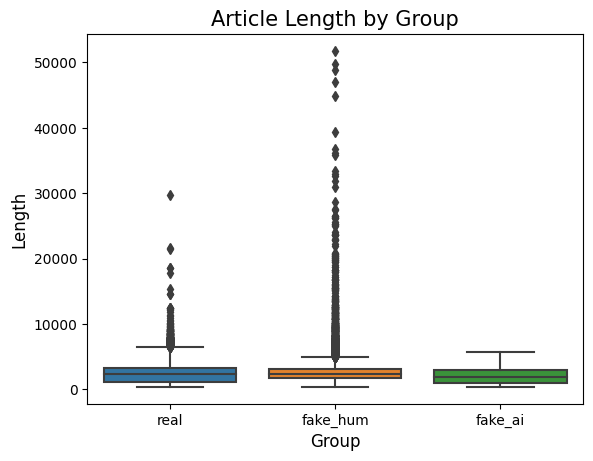

In [26]:
sns.boxplot(x='group', y='length', data=articles_df)

plt.xlabel("Group", fontsize= 12)
plt.ylabel("Length", fontsize= 12)
plt.title("Article Length by Group", fontsize=15)

In [27]:
# Longest fake_ai article
articles_df[articles_df.group == 'fake_ai'].length.max()

5705

In [28]:
# All articles that are too long
articles_df[articles_df.length > 5711]

,title,text,subject,date,group,length
20,Exclusive: U.S. memo weakens guidelines for pr...,The U.S. Justice Department has issued new gui...,politicsNews,"December 23, 2017",real,5746
32,As Republicans aim to ride economy to election...,"In the Fox & Hound sports bar, next to a shopp...",politicsNews,"December 22, 2017",real,6679
48,"House gives final approval to tax bill, delive...",The Republican-controlled U.S. House of Repres...,politicsNews,"December 19, 2017",real,5811
63,"In Georgia, battle of the 'Staceys' tests Demo...",The two Democratic candidates running for gove...,politicsNews,"December 20, 2017",real,8133
68,What's in the final Republican tax bill,The U.S. House of Representatives gave final a...,politicsNews,"December 19, 2017",real,7006
...,...,...,...,...,...,...
36420,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,US_News,"January 15, 2016",fake_hum,25065
36423,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",fake_hum,7359
36424,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",fake_hum,26275
36426,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",fake_hum,20651


In [29]:
# importing word_tokenize to use in function below
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We do this rather than cropping all articles at the 5705 limit so that articles do not terminate in the middle of a word or sentence.

In [36]:
def article_crop(article, char_limit):
# If text is longer than char limit
  if len(article) > char_limit:

    # Split text into two groups, before and after the character limit
    before_limit = article[: char_limit]
    after_limit = article[char_limit : ]

    # If after_limit contains more than just whitespace (check is needed b/c calling sent_tokenize()[0] on whitespace will fail)
    if len(nltk.sent_tokenize(after_limit)) > 0:
        sent_after_limit = nltk.sent_tokenize(after_limit)[0] # Take 1st sentence after char_limit
        new_text = before_limit + sent_after_limit
        return new_text
    # In this case, chars after char_limit only contain whitespace
    else:
        return before_limit

  else:
    return article

In [33]:
# Shows where data will be cut off at the limit
articles_df.text.iloc[63][5400:5711] 

' Dan Cantor, national chairman of the Working Families Party.      MoveOn, whose recent endorsement of Abrams marked its first in a 2018 governor’s race, said it would mobilize its 125,000 Georgia members as volunteers for her campaign.      Democracy for America is similarly engaging nearly 35,000 members in '

In [34]:
# Shows the final sentence being completed using article_crop()
article_crop(articles_df.text.iloc[63], 5711)[5400:] 

' Dan Cantor, national chairman of the Working Families Party.      MoveOn, whose recent endorsement of Abrams marked its first in a 2018 governor’s race, said it would mobilize its 125,000 Georgia members as volunteers for her campaign.      Democracy for America is similarly engaging nearly 35,000 members in the state.'

In [37]:
# For texts longer than 5711 chars (the longest AI text), crop when the sentence at 5705 chars ends
articles_df['text'] = articles_df.text.apply(lambda x: article_crop(x, 5705))
articles_df

,title,text,subject,date,group,length
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real,4636
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real,4054
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real,2766
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real,2431
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real,5173
...,...,...,...,...,...,...
181625,NaN,NEW YORK (FOX 5) - The NYPD has strong evidenc...,NaN,NaN,fake_ai,1526
181626,NaN,"Taipei, July 18 (CNA) As emotional public grie...",NaN,NaN,fake_ai,2680
181627,NaN,"Update, 7:31 p.m.: Aaron Hernandez was found d...",NaN,NaN,fake_ai,1334
181628,NaN,Peter Lynn wrote this post on his personal blo...,NaN,NaN,fake_ai,585


In [38]:
articles_df['length'] = articles_df['text'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Article Length by Group')

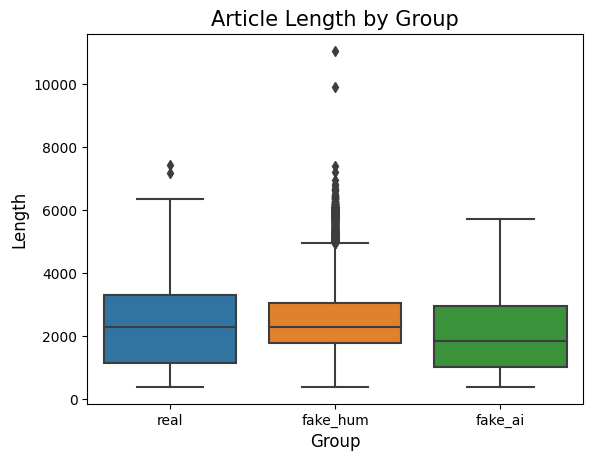

In [48]:
sns.boxplot(x='group', y='length', data=articles_df)
plt.xlabel("Group", fontsize= 12)
plt.ylabel("Length", fontsize= 12)
plt.title("Article Length by Group", fontsize=15)

## Sentence tokenization 

For each article we are creating a list of lists containing individual sentences. We will use these as features for our ML models and to compute average words per sentence. 

In [40]:
# Tokenize sentences
articles_df['sentences'] = articles_df['text'].apply(lambda x: nltk.sent_tokenize(x))
articles_df

,title,text,subject,date,group,length,sentences
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real,4636,[The head of a conservative Republican faction...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real,4054,[Transgender people will be allowed for the fi...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real,2766,[The special counsel investigation of links be...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real,2431,[Trump campaign adviser George Papadopoulos to...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real,5173,"[President Donald Trump called on the U.S., Po..."
...,...,...,...,...,...,...,...
181625,NaN,NEW YORK (FOX 5) - The NYPD has strong evidenc...,NaN,NaN,fake_ai,1526,[NEW YORK (FOX 5) - The NYPD has strong eviden...
181626,NaN,"Taipei, July 18 (CNA) As emotional public grie...",NaN,NaN,fake_ai,2680,"[Taipei, July 18 (CNA) As emotional public gri..."
181627,NaN,"Update, 7:31 p.m.: Aaron Hernandez was found d...",NaN,NaN,fake_ai,1334,"[Update, 7:31 p.m.: Aaron Hernandez was found ..."
181628,NaN,Peter Lynn wrote this post on his personal blo...,NaN,NaN,fake_ai,585,[Peter Lynn wrote this post on his personal bl...


## Average words per sentence 
We apply the function defined below to each article to create a column of average words per sentence for each sample

In [42]:
def avg_words_per_sent(text):
    num_words_list = [] # List of word count per sentence

    for sent in range(len(text)):

        # Number of words in a sentence, excludes punctuation
        num_words = len([word for word in word_tokenize(text[sent]) if word.isalnum()])

        # Add number of words for sentence to the list
        num_words_list.append(num_words)


        # Compute the average
        avg_word_per_sentences = sum(num_words_list) / len(num_words_list)

    return avg_word_per_sentences


In [43]:
# Compute avg words per sentence for each column
articles_df['words_per_sent'] = articles_df['sentences'].apply(lambda x: avg_words_per_sent(x))

In [44]:
articles_df.head()

,title,text,subject,date,group,length,sentences,words_per_sent
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real,4636,[The head of a conservative Republican faction...,24.700000
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real,4054,[Transgender people will be allowed for the fi...,29.190476
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real,2766,[The special counsel investigation of links be...,26.882353
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real,2431,[Trump campaign adviser George Papadopoulos to...,23.312500
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real,5173,"[President Donald Trump called on the U.S., Po...",20.850000


### Visualizing avg words per sentence

Text(0.5, 1.0, 'Avg words per sentence by group')

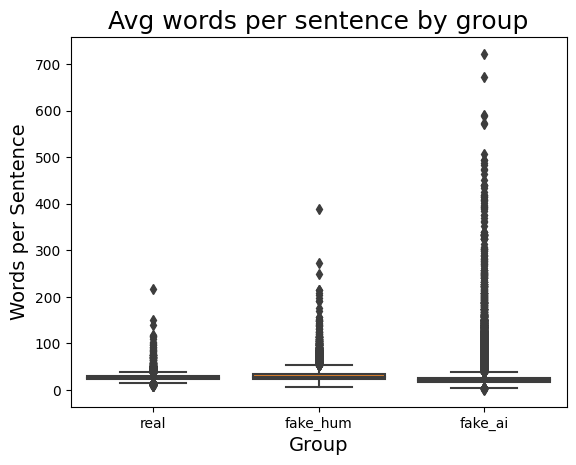

In [45]:
sns.boxplot(x='group', y='words_per_sent', data=articles_df)

plt.xlabel("Group", fontsize= 14)
plt.ylabel("Words per Sentence", fontsize= 14)
plt.title("Avg words per sentence by group", fontsize=18)

### Dropping Outliers - Avg words per sentence

One limitation of our project is that the contents of GPT-2's outputs are not limited to text about news-related topics.

The majority of the data that GPT-2 was trained on was news articles on the web, and so a majority of its outputs are news-related content. However, GPT-2 was also trained on non-news text from the web, and so some of its outputs are not news-related.

When we took a closer look at the fake_ai articles with a particularly high average words per sentence, we noticed that they seem to be almost entirely non-news subjects. Many seem to be song lyrics generated by GPT-2, or look like text scraped from a Youtube page. The high average is caused by sent_tokenizer() splitting these texts into a relatively few number of sentences.

Since we have nearly 10x the number of AI articles compared to the other two groups, we can afford to drop these outliers. Dropping them will also give us the desirable effects of: 
1.   Having a higher proportion of news content in our fake_ai group
2.   Reducing the disparity of average words/sentence between groups

In [46]:
# AI text higher than 100 words per sentence
articles_df[(articles_df['words_per_sent'] > 100) & (articles_df['group'] == "fake_ai")]

,title,text,subject,date,group,length,sentences,words_per_sent
36531,NaN,Board /3/ - 3DCG /a/ - Anime & Manga /aco/ - A...,NaN,NaN,fake_ai,1966,[Board /3/ - 3DCG /a/ - Anime & Manga /aco/ - ...,148.0
36919,NaN,Distance (national) Within 1 mile Within 5 mil...,NaN,NaN,fake_ai,1367,[Distance (national) Within 1 mile Within 5 mi...,116.0
36936,NaN,Western Michigan [0-3] at Michigan [2-1] All ...,NaN,NaN,fake_ai,1619,[Western Michigan [0-3] at Michigan [2-1] All...,110.5
36993,NaN,Identification and Trait Identification of Hot...,NaN,NaN,fake_ai,966,[Identification and Trait Identification of Ho...,148.0
37005,NaN,Welcome to The Fall The Annual Scary Good Horr...,NaN,NaN,fake_ai,3922,[Welcome to The Fall The Annual Scary Good Hor...,158.8
...,...,...,...,...,...,...,...,...
179834,NaN,WORKS ON ALL SGN SUBS will have the mix added ...,NaN,NaN,fake_ai,1982,[WORKS ON ALL SGN SUBS will have the mix added...,148.0
179869,NaN,All results Sizes (3) By type Basic (14) Batte...,NaN,NaN,fake_ai,1483,[All results Sizes (3) By type Basic (14) Batt...,324.0
179870,NaN,NOEH-D Meshu Lungchi Film Process Superioree ...,NaN,NaN,fake_ai,1678,[NOEH-D Meshu Lungchi Film Process Superioree ...,110.5
180209,NaN,West Indies skipper Darren Sammy led the way 3...,NaN,NaN,fake_ai,565,[West Indies skipper Darren Sammy led the way ...,106.0


There were also a small number of human-authored texts (real and fake_hum) with a relatively high average words per sentence.

In [52]:
# Human authored text higher than 100 words per sentence
articles_df[(articles_df['words_per_sent'] > 100) & (articles_df['group'] != "fake_ai")]

,title,text,subject,date,group,length,sentences,words_per_sent


When we took a closer look, the high average for these outliers appears to be due to the nature of the particular articles.

Articles describing a timeline had a particularly high average. As mentioned in the "Crop long articles" section, they contain colons or semi-colons for each event described in the timeline. sent_tokenize() recognizes this as a single sentence, leading to a particularly high average.

These outliers also included articles that were written without a space after the period ending a sentence. Again, sent_tokenize() will not parse these into individual sentences, leading to high averages.

In [48]:
# fake_hum article without space between periods
articles_df.sentences.iloc[36311] 

['21st Century Wire says This is the news that the elite political establishment did not want to hear.Watch a video of this report here:A new poll by Rasmussen Reports has Donald Trump beating Hillary Clinton by two points in a head-to-head matchup.Trump comes in at 41% with Clinton trailing behind with 39%.15% of respondents would prefer some other candidate, while 5% were undecided.Last week, Rasmussen ran the same poll and the candidates were evenly split with 38% each.Other polls have suggested that Trump has no chance of beating Hillary, but this latest development certainly brings those conclusions into question.The elite political establishment class is definitely going to be worried by this news, and the ridiculous attacks levelled against Trump may be about to reach new heights.Most worrying for those elites is the thought of America getting along with other countries, something that Trump has explicitly stated he wants to do as president.This means an end to foreign adventuri

We decided to drop all articles with a high average number of words per sentence (> than 100).

The majority of samples that fall into this group are fake_ai text about non-news related topics. This will increase the proportion of news in our fake_ai set.

87 human-authored articles were also dropped as a result, but since this is a small number of articles and they are composed of text written in unconventional formatting, we are fine with dropping them.

In [53]:
# Dropping articles with 100+ average words per sentence
articles_df.drop(articles_df[articles_df['words_per_sent'] > 100].index, inplace=True)

# Reset index
articles_df.reset_index(drop=True, inplace=True)

print("New count of articles")
print("# of articles for real: " + str(len(articles_df[articles_df['group'] == 'real'])))
print("# of articles for fake_hum: " + str(len(articles_df[articles_df['group'] == 'fake_hum'])))
print("# of articles for fake_ai: " + str(len(articles_df[articles_df['group'] == 'fake_ai'])))

New count of articles
# of articles for real: 20033
# of articles for fake_hum: 16307
# of articles for fake_ai: 144513


We can see in the two plots below that the disparity between groups has been significantly reduced.

Text(0.5, 1.0, 'Avg words per sentence by group')

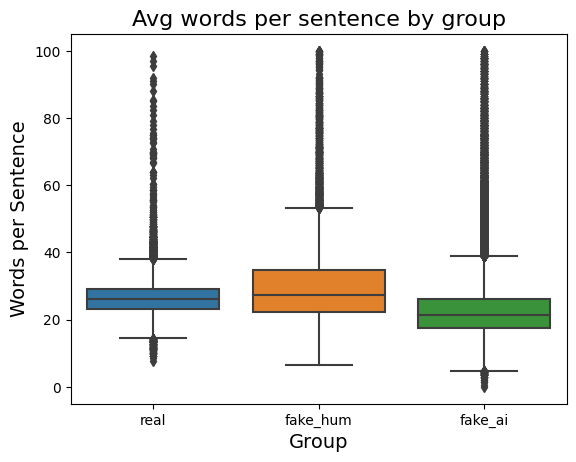

In [54]:
# Replotting avg words per sentence
sns.boxplot(x='group', y='words_per_sent', data=articles_df)

plt.xlabel("Group", fontsize= 14)
plt.ylabel("Words per Sentence", fontsize= 14)
plt.title("Avg words per sentence by group", fontsize=16)

Text(0.5, 1.0, 'Distribution of avg. words/sentence by group')

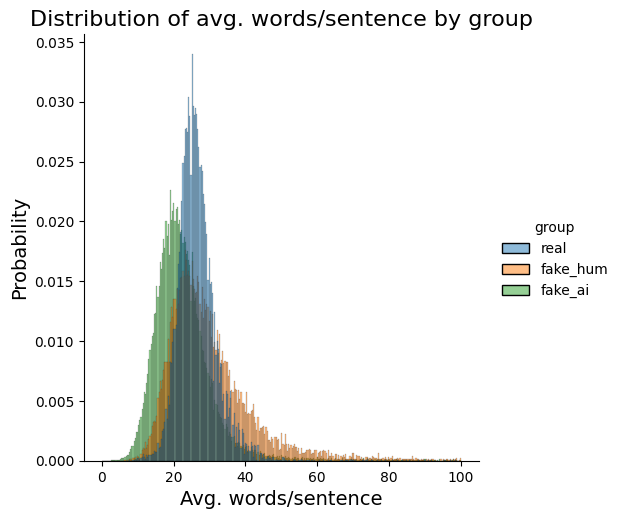

In [55]:
# Plotting probability distribution due to uneven # of samples between groups
sns.displot(articles_df, x='words_per_sent', hue='group', stat='probability', common_norm=False)

plt.ylabel("Probability", fontsize= 14)
plt.xlabel("Avg. words/sentence", fontsize= 14)
plt.title("Distribution of avg. words/sentence by group", fontsize=16)

## Lowercasing text
We will use this column later on when controlling for differences in word frequencies between groups

In [56]:
# Create column of lowercase text
articles_df['text_lower'] = articles_df['text'].apply(lambda x: x.lower())

articles_df.head()

,title,text,subject,date,group,length,sentences,words_per_sent,text_lower
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real,4636,[The head of a conservative Republican faction...,24.700000,the head of a conservative republican faction ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real,4054,[Transgender people will be allowed for the fi...,29.190476,transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real,2766,[The special counsel investigation of links be...,26.882353,the special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real,2431,[Trump campaign adviser George Papadopoulos to...,23.312500,trump campaign adviser george papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real,5173,"[President Donald Trump called on the U.S., Po...",20.850000,president donald trump called on the u.s. post...


## Word frequencies between groups
In this section we explored the differences in the most common words between groups. 

We noticed a lot of overlap between the two human-authored groups and much less overlap when compared to the AI text.

Finally, we construct an additonal method for filtering out and dropping non-news related AI text.

In [57]:
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

stopwords = set(stopwords.words('english')) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We create a function that tokenizes text into words and removes stop words. 

In [58]:
def tokenize_text(article):
  
  tok_text = nltk.word_tokenize(article)
  tok_text = [word.lower() for word in tok_text]
  tok_text = [word for word in tok_text if word not in stopwords]
  tok_text = [word for word in tok_text if word.isalpha()]
  

  return tok_text

Now we create a list of text articles for each group and apply our tokenize_text() to each list.

Each of the 3 results are a list of lists containing words, so we flatten them into 3 lists of words



In [59]:
# Create a list of text articles for each group
real_text_list = list(articles_df.text[articles_df.group == "real"]) 
fakehum_text_list= list(articles_df.text[articles_df.group == "fake_hum"])
ai_text_list = list(articles_df.text[articles_df.group == "fake_ai"])


# Tokenize and clean the lists from stopwords
# each result is list of lists containing words for each article
real_word_list = [tokenize_text(article) for article in real_text_list] 
fakehum_word_list = [tokenize_text(article) for article in fakehum_text_list] 
ai_word_list = [tokenize_text(article) for article in ai_text_list] 


#flatten the list of lists into a single list of words
flat_real_word_list = [word for article in real_word_list for word in article]
flat_fakehum_word_list = [word for article in fakehum_word_list for word in article]
flat_ai_word_list = [word for article in ai_word_list for word in article]

### Most Common Words
Using the flat lists of words for each group that we created above, we use Counters to count the 50 most common words in each group.

In [60]:
from collections import Counter

# 50 most common words for real
real_cnt = Counter(flat_real_word_list)
real_most_common = real_cnt.most_common(50)

# Show top 30
real_most_common[:30]

[('said', 94938),
 ('trump', 52114),
 ('would', 30466),
 ('president', 25173),
 ('state', 18988),
 ('government', 17657),
 ('states', 15912),
 ('house', 15729),
 ('also', 15390),
 ('new', 15351),
 ('republican', 14773),
 ('united', 14773),
 ('people', 14525),
 ('told', 13636),
 ('could', 13229),
 ('last', 12239),
 ('one', 12149),
 ('party', 12058),
 ('two', 11184),
 ('election', 11148),
 ('year', 10623),
 ('campaign', 10234),
 ('former', 10121),
 ('donald', 9993),
 ('security', 9686),
 ('percent', 9679),
 ('north', 9383),
 ('clinton', 9223),
 ('court', 9083),
 ('white', 8901)]

In [61]:
# 50 most common words for fake_hum
fakehum_cnt = Counter(flat_fakehum_word_list)
fakehum_most_common = fakehum_cnt.most_common(50)

# Show top 30
fakehum_most_common[:30]

[('trump', 62414),
 ('said', 22053),
 ('people', 19783),
 ('president', 18462),
 ('would', 17100),
 ('one', 16460),
 ('donald', 14557),
 ('like', 13328),
 ('obama', 12120),
 ('clinton', 11769),
 ('even', 10474),
 ('also', 10359),
 ('via', 9961),
 ('white', 9553),
 ('new', 9472),
 ('time', 9347),
 ('news', 9164),
 ('image', 9011),
 ('hillary', 8974),
 ('us', 8224),
 ('get', 8181),
 ('state', 8131),
 ('campaign', 7978),
 ('know', 7959),
 ('going', 7667),
 ('house', 7617),
 ('republican', 7511),
 ('america', 7181),
 ('could', 7172),
 ('first', 6933)]

In [62]:
# 50 most common words for ai
ai_cnt = Counter(flat_ai_word_list)
ai_most_common = ai_cnt.most_common(50)

# Show top 30
ai_most_common[:30]

[('said', 133376),
 ('one', 118232),
 ('new', 98536),
 ('would', 87782),
 ('like', 86349),
 ('also', 80180),
 ('people', 77266),
 ('time', 75443),
 ('first', 60923),
 ('get', 60172),
 ('could', 55268),
 ('two', 54260),
 ('us', 53036),
 ('may', 48583),
 ('make', 48389),
 ('even', 47326),
 ('last', 47263),
 ('year', 46010),
 ('see', 44516),
 ('years', 43975),
 ('many', 43716),
 ('back', 42949),
 ('world', 41518),
 ('use', 41184),
 ('way', 40658),
 ('game', 40054),
 ('well', 38542),
 ('state', 38203),
 ('made', 37055),
 ('know', 36652)]

### Word Clouds
By viewing the lists of the 20 most common words for each group, we can see high overlap between the two human-authored groups (real and fake_hum) and less overlap with the AI text.

Visualizing the word clouds below makes this difference more clear.

In [63]:
from wordcloud import WordCloud

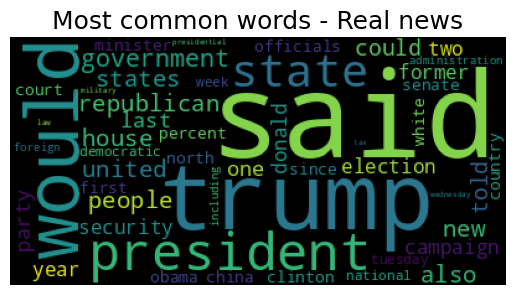

In [64]:
real_wordcloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(real_cnt)
plt.imshow(real_wordcloud)
plt.axis("off")
plt.title("Most common words - Real news", fontsize=18)
plt.show()

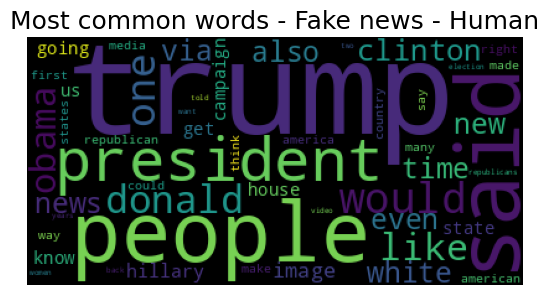

In [65]:
fakehum_wordcloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(fakehum_cnt)
plt.imshow(fakehum_wordcloud)
plt.axis("off")
plt.title("Most common words - Fake news - Human", fontsize=18)
plt.show()

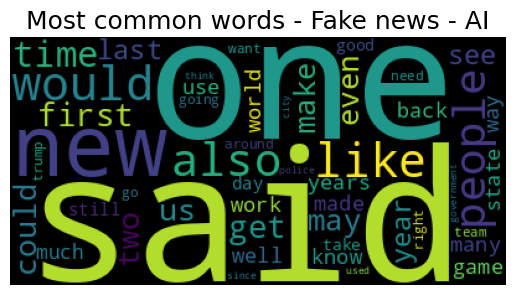

In [66]:
ai_wordcloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(ai_cnt)
plt.imshow(ai_wordcloud)
plt.axis("off")
plt.title("Most common words - Fake news - AI", fontsize=18)
plt.show()

### Interpreting and correcting for differences between groups
From looking at the word clouds and lists of most common words we can see that the two human-authored groups contain a higher frequency of political or news-oriented words. Notice differences in words like "trump", "president", "obama", and "election".

Some words like "said" and "trump" are highly represented in all 3 groups. 

The AI text had relatively fewer politically-related words in its most common word list. Again, this is due to GPT-2 not being trained exclusively on news articles -- a subset of its training data contained non-news contents.

In a previous section we reduced this disparity to some extent by dropping articles averaging 100+ words per sentence -- the majority of those dropped were AI articles that did not follow a typical news article's sentence structure (such as song lyrics or YouTube pages). 

In this section, we take further action to reduce the AI's non-news content by:
1.   Creating two lists of the 50 most common words for both of the human-authored groups.
2.   Combining these two lists into a unique set of words - "human_words".
3.  Tagging human_words with parts of speech, and keeping the nouns ONLY -- the result is a list of newsworthy nouns.
4. Dropping any nouns that we deem to be not news-related.
5. Dropping all AI articles from our dataframe that do not contain ANY of the news-worthy nouns. 



Below we create a list of the 50 most common words in real and fake_hum and combine them into a unique set.

In [67]:
real_words = []
for i in range(len(real_most_common)):
  # Add the word, not the frequency count
  real_words.append(real_most_common[i][0])

# List of most 50 common words in real
real_words



fake_words = []
for i in range(len(fakehum_most_common)):
  # Add the word, not the frequency count
  fake_words.append(fakehum_most_common[i][0])

# List of most 50 common words in fake
fake_words

['trump',
 'said',
 'people',
 'president',
 'would',
 'one',
 'donald',
 'like',
 'obama',
 'clinton',
 'even',
 'also',
 'via',
 'white',
 'new',
 'time',
 'news',
 'image',
 'hillary',
 'us',
 'get',
 'state',
 'campaign',
 'know',
 'going',
 'house',
 'republican',
 'america',
 'could',
 'first',
 'make',
 'right',
 'many',
 'states',
 'american',
 'media',
 'say',
 'think',
 'made',
 'country',
 'way',
 'republicans',
 'told',
 'video',
 'back',
 'election',
 'women',
 'years',
 'two',
 'want']

In [68]:
# Create set from the 50 most common words from both human-authored groups
human_words = set(real_words + fake_words)

print(len(human_words))
print("")
print(human_words)

77

{'could', 'court', 'first', 'administration', 'state', 'presidential', 'also', 'officials', 'even', 'trump', 'national', 'say', 'house', 'would', 'women', 'made', 'two', 'know', 'years', 'many', 'week', 'think', 'obama', 'american', 'news', 'right', 'government', 'election', 'including', 'going', 'minister', 'year', 'make', 'democratic', 'via', 'video', 'like', 'media', 'donald', 'image', 'campaign', 'north', 'percent', 'tuesday', 'hillary', 'united', 'white', 'told', 'since', 'security', 'republican', 'china', 'republicans', 'time', 'military', 'former', 'us', 'one', 'president', 'last', 'way', 'clinton', 'party', 'new', 'country', 'senate', 'tax', 'want', 'america', 'states', 'wednesday', 'back', 'law', 'people', 'said', 'get', 'foreign'}


In [69]:
# Tag most common human-authored words with parts of speech
nltk.pos_tag(human_words)

[('could', 'MD'),
 ('court', 'NN'),
 ('first', 'JJ'),
 ('administration', 'NN'),
 ('state', 'NN'),
 ('presidential', 'JJ'),
 ('also', 'RB'),
 ('officials', 'NNS'),
 ('even', 'RB'),
 ('trump', 'VBP'),
 ('national', 'JJ'),
 ('say', 'VBP'),
 ('house', 'NN'),
 ('would', 'MD'),
 ('women', 'NNS'),
 ('made', 'VBD'),
 ('two', 'CD'),
 ('know', 'JJ'),
 ('years', 'NNS'),
 ('many', 'JJ'),
 ('week', 'NN'),
 ('think', 'VBP'),
 ('obama', 'IN'),
 ('american', 'JJ'),
 ('news', 'NN'),
 ('right', 'JJ'),
 ('government', 'NN'),
 ('election', 'NN'),
 ('including', 'VBG'),
 ('going', 'VBG'),
 ('minister', 'NN'),
 ('year', 'NN'),
 ('make', 'VBP'),
 ('democratic', 'JJ'),
 ('via', 'IN'),
 ('video', 'NN'),
 ('like', 'IN'),
 ('media', 'NNS'),
 ('donald', 'JJ'),
 ('image', 'NN'),
 ('campaign', 'NN'),
 ('north', 'JJ'),
 ('percent', 'NN'),
 ('tuesday', 'NN'),
 ('hillary', 'JJ'),
 ('united', 'VBD'),
 ('white', 'JJ'),
 ('told', 'NN'),
 ('since', 'IN'),
 ('security', 'NN'),
 ('republican', 'JJ'),
 ('china', 'NN'),
 ('r

By keeping nouns ONLY, we get a useful list of news-worthy words

In [70]:
# keep only nouns in human_words
tagged_human_words = nltk.pos_tag(human_words)

human_nouns = [word_tag_pair[0] for word_tag_pair in tagged_human_words if word_tag_pair[1] == 'NN']
human_nouns 

['court',
 'administration',
 'state',
 'house',
 'week',
 'news',
 'government',
 'election',
 'minister',
 'year',
 'video',
 'image',
 'campaign',
 'percent',
 'tuesday',
 'told',
 'security',
 'china',
 'time',
 'president',
 'way',
 'party',
 'country',
 'tax',
 'want',
 'america',
 'law']

We drop some words that can be common in non-news articles. 
If we do not do this, relatively few words will be dropped from out fake_ai group.

In [71]:
# Remove the following words: way, image, time, year, video, get, week
human_nouns = [word for word in human_nouns if word not in ['way', 'time', 'image', 'year', 'video', 'get', 'week']]

# Final list
human_nouns

['court',
 'administration',
 'state',
 'house',
 'news',
 'government',
 'election',
 'minister',
 'campaign',
 'percent',
 'tuesday',
 'told',
 'security',
 'china',
 'president',
 'party',
 'country',
 'tax',
 'want',
 'america',
 'law']

We use the function below to create a column that tests if any of the words in human_nouns (a set of most common news-related nouns in the two human group) are in each article.

We will use this column to drop all AI articles that do not contain any of these words

In [72]:
def contains_word_in_list(text, word_list):
  """ Given a text string, returns true if string contains any word in word_list
  else returns false

  :param - text -- string
  : word_list - a list of words
  """
  if any(word in text for word in word_list):
    return True
  else:
    return False

In [73]:
# Create column
articles_df["contains_human_word"] = articles_df['text_lower'].apply(lambda x: contains_word_in_list(x, human_nouns))

In [74]:
# Lets recount how many articles we have before dropping more AI articles

print("# of articles for real: " + str(len(articles_df[articles_df['group'] == 'real'])))
print("# of articles for fake_hum: " + str(len(articles_df[articles_df['group'] == 'fake_hum'])))
print("# of articles for fake_ai: " + str(len(articles_df[articles_df['group'] == 'fake_ai'])))

# of articles for real: 20033
# of articles for fake_hum: 16307
# of articles for fake_ai: 144513


We've dropped 47,922 fake_ai articles by applying this filter!

In [75]:
# Drop AI_articles without human news words
articles_df.drop(articles_df[(articles_df.group=="fake_ai") & (articles_df.contains_human_word==False)].index, inplace=True)

# Drop contains_human_word column because no longer needed
articles_df.drop(['contains_human_word'], axis=1, inplace=True)

# Reset index
articles_df.reset_index(drop=True, inplace=True)

print("# of articles for real: " + str(len(articles_df[articles_df['group'] == 'real'])))
print("# of articles for fake_hum: " + str(len(articles_df[articles_df['group'] == 'fake_hum'])))
print("# of articles for fake_ai: " + str(len(articles_df[articles_df['group'] == 'fake_ai'])))

# of articles for real: 20033
# of articles for fake_hum: 16307
# of articles for fake_ai: 107963


### Viewing changes in AI word frequency
We can see by looking at Word Clouds and lists of most common words of fake_ai before and after applying the filter that poltical news-oriented words show up with greater frequency after the drop.

Words like "government", "trump", "state" "president", and "police" show up with greater frequency.

In [76]:
# AI most common words before drop
ai_most_common[:15]

[('said', 133376),
 ('one', 118232),
 ('new', 98536),
 ('would', 87782),
 ('like', 86349),
 ('also', 80180),
 ('people', 77266),
 ('time', 75443),
 ('first', 60923),
 ('get', 60172),
 ('could', 55268),
 ('two', 54260),
 ('us', 53036),
 ('may', 48583),
 ('make', 48389)]

In [77]:
# AI most common words after drop
new_ai_most_common = ai_cnt.most_common(50)
new_ai_most_common[:15]

[('said', 133376),
 ('one', 118232),
 ('new', 98536),
 ('would', 87782),
 ('like', 86349),
 ('also', 80180),
 ('people', 77266),
 ('time', 75443),
 ('first', 60923),
 ('get', 60172),
 ('could', 55268),
 ('two', 54260),
 ('us', 53036),
 ('may', 48583),
 ('make', 48389)]

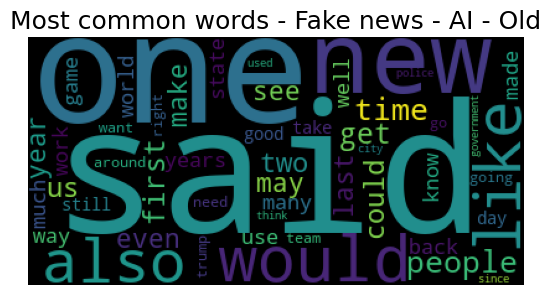

In [78]:
# Compare old word cloud
ai_wordcloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(ai_cnt)
plt.imshow(ai_wordcloud)
plt.axis("off")
plt.title("Most common words - Fake news - AI - Old", fontsize=18)
plt.show()

In [ ]:
# New ai word cloud

# Same process as before to generate word cloud
new_ai_text_list = list(articles_df.text[articles_df.group == "fake_ai"])
new_ai_word_list = [tokenize_text(article) for article in new_ai_text_list] 
new_flat_ai_word_list = [word for article in new_ai_word_list for word in article]

new_ai_cnt = Counter(new_flat_ai_word_list)

new_ai_wordcloud = WordCloud(background_color="black", max_words=50).generate_from_frequencies(new_ai_cnt)
plt.imshow(new_ai_wordcloud)
plt.axis("off")
plt.title("Most common words - Fake news - AI - New", fontsize=18)
plt.show()

## Sentiment Score 
Here we use the Afinn library to get a sentiment score for each article.

The library uses a wordlist to produce sentiment scores on a larger body of text. It's a fast and easy way to obtain text sentiment without training a ML model from scratch.

In [ ]:
!pip install afinn
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

# Example of sentiment scores
print('Score for "I hate this and it sucks": ', afinn.score("I hate this and it sucks"))
print('Score for "I love it and it\'s great!": ', afinn.score("I love it and it's great!"))

In [ ]:
# Create sentiment column
articles_df['sentiment'] = articles_df.text.apply(lambda x: afinn.score(x))

### Visualizing sentiment

In [ ]:
sns.boxplot(x='group', y='sentiment', data=articles_df)

plt.xlabel("Group", fontsize= 14)
plt.ylabel("Sentiment", fontsize= 14)
plt.title("Sentiment by group", fontsize=18)

Looking at the plot above we can see:


*   As we move from left to right, the range of sentiment increases between groups.
*   The real articles have the smallest range of sentiment, and AI articles have the largest.
*   Median sentiment is the highest for the AI text. 



In [80]:
# Final df
articles_df.head()

,title,text,subject,date,group,length,sentences,words_per_sent,text_lower
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real,4636,[The head of a conservative Republican faction...,24.700000,the head of a conservative republican faction ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real,4054,[Transgender people will be allowed for the fi...,29.190476,transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real,2766,[The special counsel investigation of links be...,26.882353,the special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real,2431,[Trump campaign adviser George Papadopoulos to...,23.312500,trump campaign adviser george papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real,5173,"[President Donald Trump called on the U.S., Po...",20.850000,president donald trump called on the u.s. post...


## Revisualizing differences
Now that we have dropped a significant number of articles, we take a look at how this has impacted our data.

Text(0.5, 1.0, 'Article Length by Group')

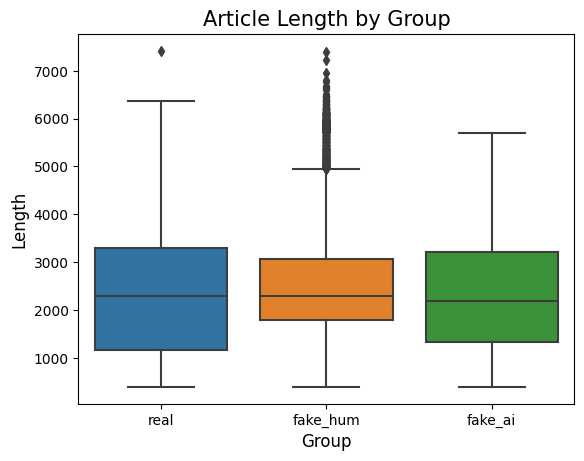

In [81]:
# Viewing new article lengths after crops
sns.boxplot(x='group', y='length', data=articles_df)

plt.xlabel("Group", fontsize= 12)
plt.ylabel("Length", fontsize= 12)
plt.title("Article Length by Group", fontsize=15)

The average article length is now nearly identical between groups.

In [82]:
# articles_df.describe()
print("Avg length - real: " + str(articles_df[articles_df['group']== 'real'].length.mean()))
print("Avg length - fake_hum: " + str(articles_df[articles_df['group']== 'fake_hum'].length.mean()))
print("Avg length - fake_ai: " + str(articles_df[articles_df['group']== 'fake_ai'].length.mean()))

Avg length - real: 2427.0622972096044
Avg length - fake_hum: 2536.1551480959097
Avg length - fake_ai: 2310.0272983584096


The average words per sentences between groups is also much more similar. **Now we are ready to run our ML models!**

Text(0.5, 1.0, 'Avg words per sentence by group')

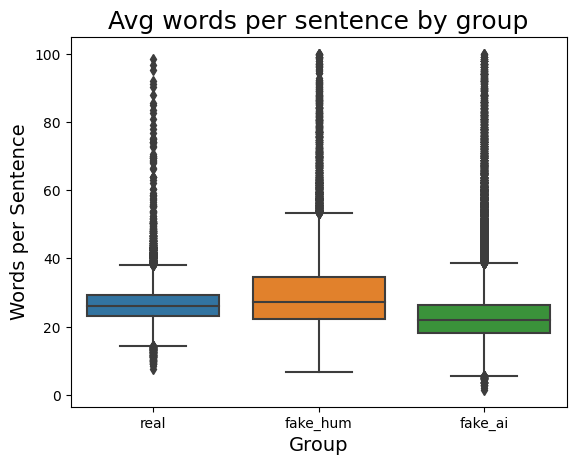

In [83]:
sns.boxplot(x='group', y='words_per_sent', data=articles_df)

plt.xlabel("Group", fontsize= 14)
plt.ylabel("Words per Sentence", fontsize= 14)
plt.title("Avg words per sentence by group", fontsize=18)

## Clustering Part I - Subset of Data

**Pre-Processing**

Here we quickly define subsets of data that we will use to train and test our clustering and classification algorithms prior to transforming them into vectors. We split our data into different lists and vectors so that we can run the classification algorithm on different parts of our overall corpus.


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

real_text = articles_df[articles_df['group'] == "real"][['text','group']][:1000]
fake_text = articles_df[articles_df['group']=='fake_hum'][['text','group']][:500]
ai_text = articles_df[articles_df['group']=='fake_ai'][['text','group']][:500]

# Clustering
clustering_text_X = real_text['text'].append(fake_text['text']).append(ai_text['text'])

# Classification - Real vs. AI
# X = real_ai_text_X | y = real_ai_text_y
real_ai_text_X = real_text['text'][:500].append(ai_text['text'])
real_ai_text_y_raw = real_text['group'][:500].append(ai_text['group'])
real_ai_text_y = []
for val in real_ai_text_y_raw:
  if val == 'real':
    real_ai_text_y.append(0)
  else:
    real_ai_text_y.append(1)

# Classification - Real vs. Human
# X = real_human_text_X | y = real_human_text_y
real_human_text_X = real_text['text'][:500].append(fake_text['text'])
real_human_text_y_raw = real_text['group'][:500].append(fake_text['group'])
real_human_text_y = []
for val in real_human_text_y_raw:
  if val == 'real':
    real_human_text_y.append(0)
  else:
    real_human_text_y.append(1)

# Classification - Real vs. All Fake
# X = real_allfake_text_X | y = real_allfake_text_y
real_allfake_text_X = real_text['text'].append(fake_text['text']).append(ai_text['text'])
real_allfake_text_y_raw = real_text['group'].append(fake_text['group']).append(ai_text['group'])
real_allfake_text_y = []
real_allfake_text_clusters = []
for val in real_allfake_text_y_raw:
  if val == 'real':
    real_allfake_text_clusters.append(1)
    real_allfake_text_y.append(0)   
  elif val == 'fake_hum':
    real_allfake_text_clusters.append(2)
    real_allfake_text_y.append(1)
  else:
    real_allfake_text_clusters.append(0)
    real_allfake_text_y.append(1)


C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1630626258.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_text_X = real_text['text'].append(fake_text['text']).append(ai_text['text'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1630626258.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_text_X = real_text['text'].append(fake_text['text']).append(ai_text['text'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1630626258.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_ai_text_X = real_text['text'][:500].append(ai_text['text'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1630626258.py:15: FutureWarning: The series.append method is deprecated and will be removed from pand

**Sklearn TF-IDF Vectorization for Clustering**

Using the data we pre-processed and split in the previous cell, we vectorized the data so that we can utilize the vectors in our clustering algorithm. Here, we made use of Sklearn's TF-IDF vectorization. We were able to utilize this because we used a subset of our data so did not have to worry about RAM issues. When we tried this with all of our data, we ran into memory issues and had to utilize a separate library and sparse matricies (more about this later on).

In [79]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(real_ai_text_X)
tf_idf_norm = normalize(tf_idf)
X_real_ai = tf_idf_norm.toarray()

tf_idf_vectorizor2 = TfidfVectorizer()
tf_idf2 = tf_idf_vectorizor2.fit_transform(real_human_text_X)
tf_idf_norm2 = normalize(tf_idf2)
X_real_human = tf_idf_norm2.toarray()

tf_idf_vectorizor3 = TfidfVectorizer()
tf_idf3 = tf_idf_vectorizor3.fit_transform(real_allfake_text_X)
tf_idf_norm3 = normalize(tf_idf3)
X_real_allfake = tf_idf_norm3.toarray()

**K-Means Clustering on Subset of Data using Principal Components**



Here we cluster our subset of data. We first reduce the dimensionality of our dataset using principal components in order to help visualize the clusters in two-dimensions. After looking at the visualization, we wanted to see how accurate the clusters the text was assigned to are with the actual classes.

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


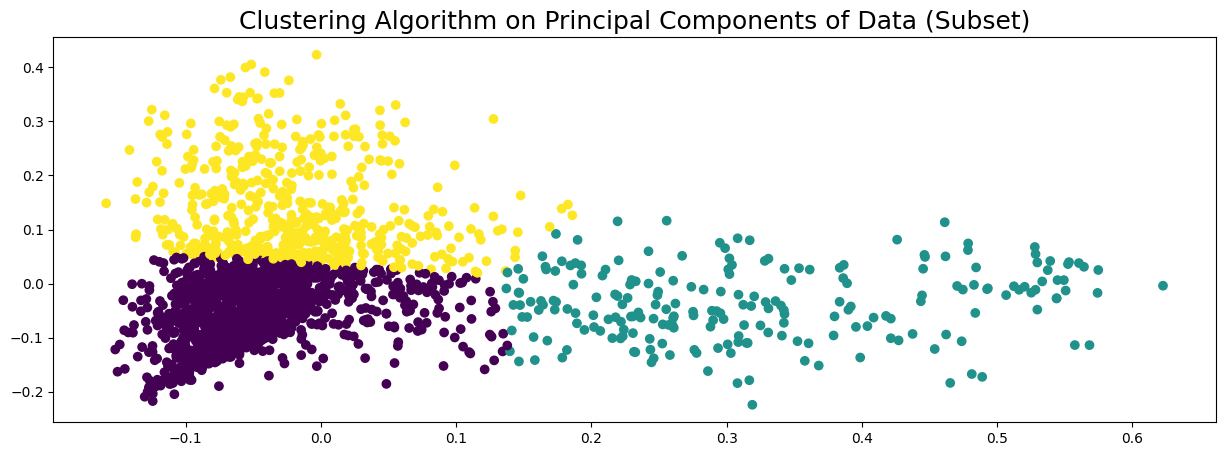

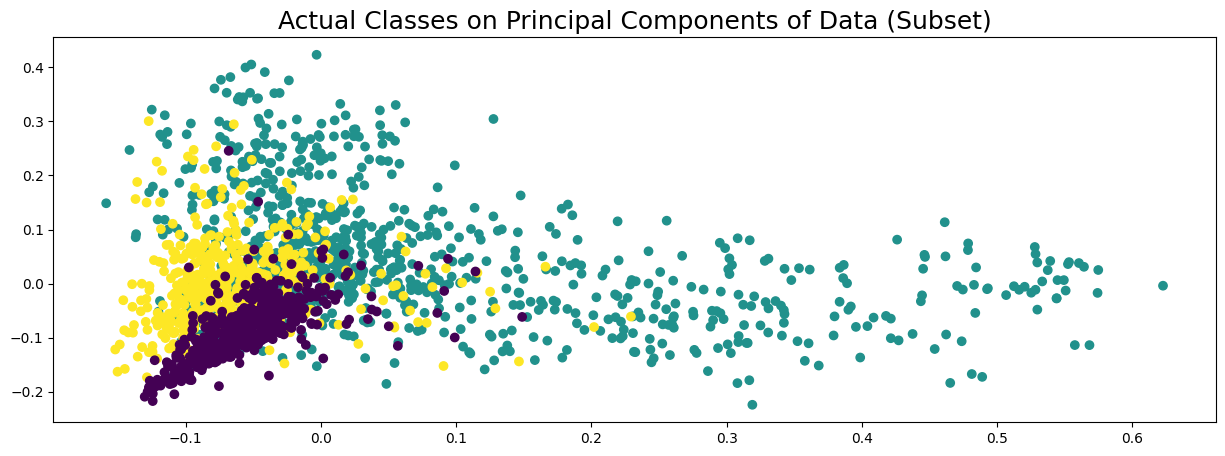

In [80]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_real_allfake)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

clustering_df = pd.DataFrame(Y_sklearn)
clustering_df.columns = ['x', 'y']
clustering_df['prediction'] = prediction

plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = prediction);
plt.title("Clustering Algorithm on Principal Components of Data (Subset)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.figure()
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = real_allfake_text_clusters);
plt.title("Actual Classes on Principal Components of Data (Subset)", size = 18)
plt.gcf().set_size_inches(15,5)

**K-Means Clustering Interpretation (Subset of Data)**

Our K-Means Clustering Algorithm was able to cluster the data into three main clusters. When comparing these clusters to the actual classes, it looks like it did a fairly good job of clustering the data into the three actual classes. There is some overlap with the yellow and purple, however, most of the data points to the right are all correctly clustered into a specific class.

This made us realize that if our clustering algorithm was this accurate, our classification algorithms should be well suited for classifying the data into groups.

## Clustering Part II - All Data

**Pre-Processing**

Here we quickly define subsets of data that we will use to train and test our clustering and classification algorithms prior to transforming them into vectors. 

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

# Limiting to 16,000 to control for different samples sizes between groups
real_text = articles_df[articles_df['group'] == "real"][['sentences','group']][:16000]
fake_text = articles_df[articles_df['group']=='fake_hum'][['sentences','group']][:16000]
ai_text = articles_df[articles_df['group']=='fake_ai'][['sentences','group']][:16000]

# Clustering
clustering_text_X = real_text['sentences'].append(fake_text['sentences']).append(ai_text['sentences'])

# Classification - Real vs. AI
# X = real_ai_text_X | y = real_ai_text_y
real_ai_text_X = real_text['sentences'].append(ai_text['sentences'])
real_ai_text_y_raw = real_text['group'].append(ai_text['group'])
real_ai_text_y = []
for val in real_ai_text_y_raw:
  if val == 'real':
    real_ai_text_y.append(0)
  else:
    real_ai_text_y.append(1)

# Classification - Real vs. Human
# X = real_human_text_X | y = real_human_text_y
real_human_text_X = real_text['sentences'].append(fake_text['sentences'])
real_human_text_y_raw = real_text['group'].append(fake_text['group'])
real_human_text_y = []
for val in real_human_text_y_raw:
  if val == 'real':
    real_human_text_y.append(0)
  else:
    real_human_text_y.append(1)

# Classification - Real vs. All Fake
# X = real_allfake_text_X | y = real_allfake_text_y
real_allfake_text_X = real_text['sentences'].append(fake_text['sentences'][:8000]).append(ai_text['sentences'][:10000])
real_allfake_text_y_raw = real_text['group'].append(fake_text['group'][:8000]).append(ai_text['group'][:10000])
real_allfake_text_y = []
real_allfake_text_clusters = []
for val in real_allfake_text_y_raw:
  if val == 'real':
    real_allfake_text_clusters.append(2)
    real_allfake_text_y.append(0)   
  elif val == 'fake_hum':
    real_allfake_text_clusters.append(0)
    real_allfake_text_y.append(1)
  else:
    real_allfake_text_clusters.append(1)
    real_allfake_text_y.append(1)


C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1839131862.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_text_X = real_text['sentences'].append(fake_text['sentences']).append(ai_text['sentences'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1839131862.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clustering_text_X = real_text['sentences'].append(fake_text['sentences']).append(ai_text['sentences'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1839131862.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_ai_text_X = real_text['sentences'].append(ai_text['sentences'])
C:\Users\akash\AppData\Local\Temp\ipykernel_4064\1839131862.py:16: FutureWarning: The series.append method is deprec

**Gensim TF_IDF Vectorization**

Using the data we pre-processed and split in the previous cell, we vectorized the data so that we can utilize the vectors in our machine learning models. We utilized the Gensim library because of how large our corpus was. This library allows us to utilize a sparse matrix rather than an array to hold our data, which helps optimize for memory.

In [82]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2csc

real_ai_text_X_raw = Dictionary(real_ai_text_X)
real_allfake_text_X_raw = Dictionary(real_allfake_text_X)
real_human_text_X_raw = Dictionary(real_human_text_X)

real_ai_corpus = [real_ai_text_X_raw.doc2bow(line) for line in real_ai_text_X]
real_allfake_corpus = [real_allfake_text_X_raw.doc2bow(line) for line in real_allfake_text_X]
real_human_corpus = [real_human_text_X_raw.doc2bow(line) for line in real_human_text_X]

real_ai_model = TfidfModel(real_ai_corpus)
real_allfake_model = TfidfModel(real_allfake_corpus)
real_human_model = TfidfModel(real_human_corpus)

real_ai_vector = real_ai_model[real_ai_corpus]
real_allfake_vector = real_allfake_model[real_allfake_corpus]
real_human_vector = real_human_model[real_human_corpus]

real_ai_X = corpus2csc(real_ai_vector).T
real_allfake_X = corpus2csc(real_allfake_vector).T
real_human_X = corpus2csc(real_human_vector).T



In [86]:
test="As U.S. looks to make India hub for ship repairs, India eyes major opportunity. L&T and U.S. Navy sign five-year Master Ship Repair Agreement"

In [87]:
#Tokenize the sentence into words
tokens = [word for word in test.split()]

#Create dictionary
dictionary = Dictionary([tokens])

print(dictionary)

Dictionary<22 unique tokens: ['Agreement', 'As', 'India', 'L&T', 'Master']...>


In [88]:
txt=[dictionary.doc2bow(doc.split()) for doc in tokens]
txt

[[(1, 1)],
 [(8, 1)],
 [(14, 1)],
 [(21, 1)],
 [(16, 1)],
 [(2, 1)],
 [(13, 1)],
 [(12, 1)],
 [(19, 1)],
 [(18, 1)],
 [(2, 1)],
 [(10, 1)],
 [(15, 1)],
 [(17, 1)],
 [(3, 1)],
 [(9, 1)],
 [(8, 1)],
 [(5, 1)],
 [(20, 1)],
 [(11, 1)],
 [(4, 1)],
 [(7, 1)],
 [(6, 1)],
 [(0, 1)]]

**Principal component-based K-Means Clustering (All Data)**

All of our data are clustered in this area. In order to aid in the two-dimensional visualization of the clusters, we first use principal components to minimize the dimensionality of our dataset. Due to the presence of a sparse matrix, we used a Truncated SVD in this clustering as opposed to the previous clustering where we used a plain-vanilla PCA. By not normalizing the data to a centroid when determining principal components, the truncated SVD differentiates and is effective for sparse matricies.


Like before, we were interested in gauging the correspondence between the text's allocated clusters and its actual classes after viewing the visualization.

Colors are chosen at random.

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


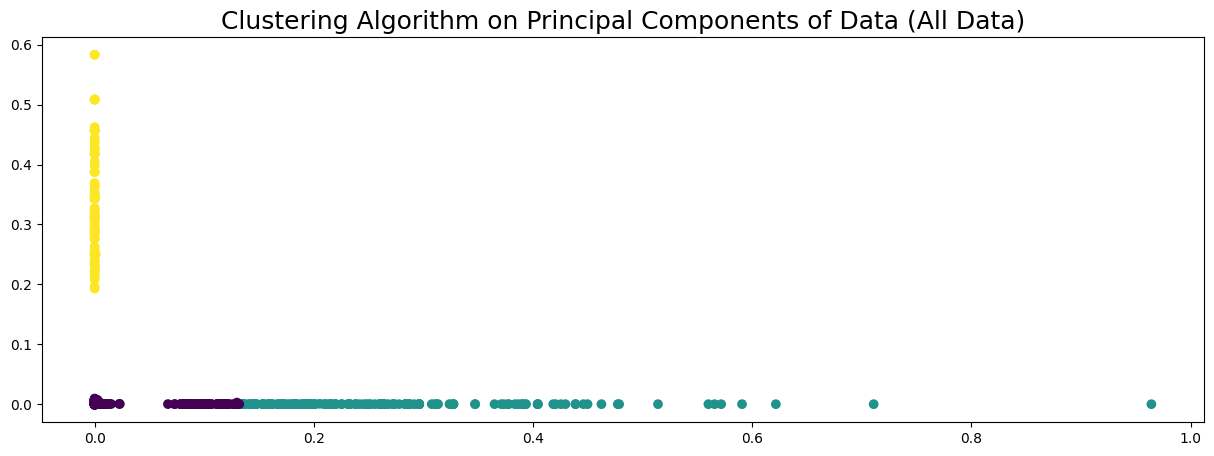

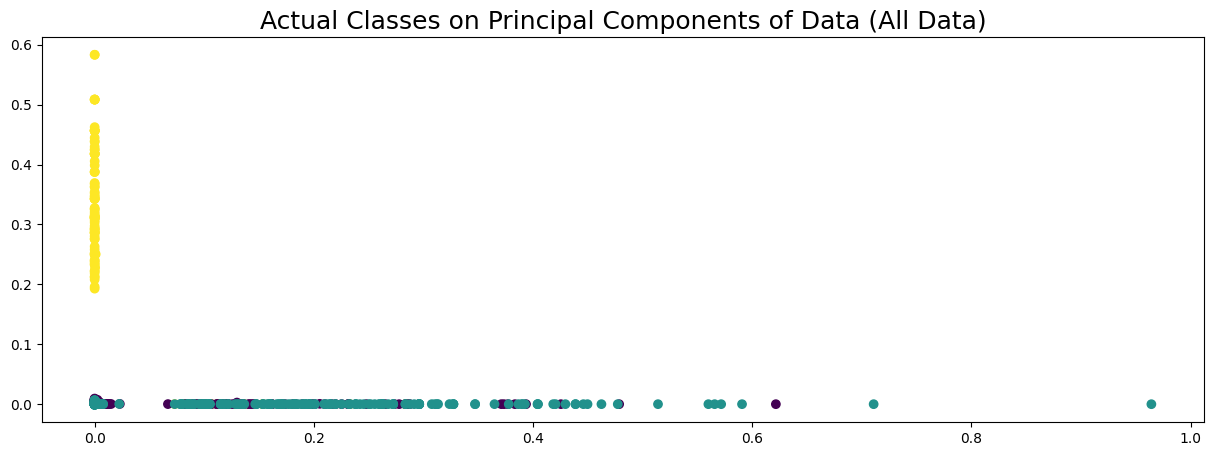

In [89]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

sklearn_pca = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(real_allfake_X)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

clustering_df = pd.DataFrame(Y_sklearn)
clustering_df.columns = ['x', 'y']
clustering_df['prediction'] = prediction


plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = prediction);
plt.title("Clustering Algorithm on Principal Components of Data (All Data)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.figure()
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c = real_allfake_text_clusters);
plt.title("Actual Classes on Principal Components of Data (All Data)", size = 18)
plt.gcf().set_size_inches(15,5)

plt.show()

**K-Means Clustering Interpretation (All of the Data)**

The data could be divided into three primary groups once again by our K-Means Clustering Algorithm. It appears that it performed better when comparing these clusters to the actual classes than when only considering a subset of the data. The clusters appear to be considerably more distinct, differentiated, and overlap-free.


## Classification Algorithms

After seeing the robust performance of our clustering algorithm in distinguishing our three classes, we were fairly confident we would be able to classify our data well. In order to do this, we decided to utilize simple models, starting with a logistic regression. More on the models later.

**Logistic Regression**
First, using a Logistic Regression, we created a straightforward categorization model for our data. For each of our sub-problems, we train our model a number of times.
To achieve a "baseline" level of categorization accuracy, we selected a logistic regression as our initial model. We would choose the models to employ for the other categorization issues based on how well this model performed.



**Random Forest - Real News vs. AI News**





In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = real_ai_X
y = real_ai_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
logits = rf.fit(X_train,y_train)
y_predict = logits.predict(X_test)

print("Accuracy: ", logit1.score(X, y)*100,"%")

Accuracy:  90.64687500000001 %


In [93]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [116]:
rf_probs=logits.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic: ROC AUC=%.3f' % (rf_auc))

Logistic: ROC AUC=0.653


In [121]:
ns_probs = [0 for _ in range(len(y_test))]

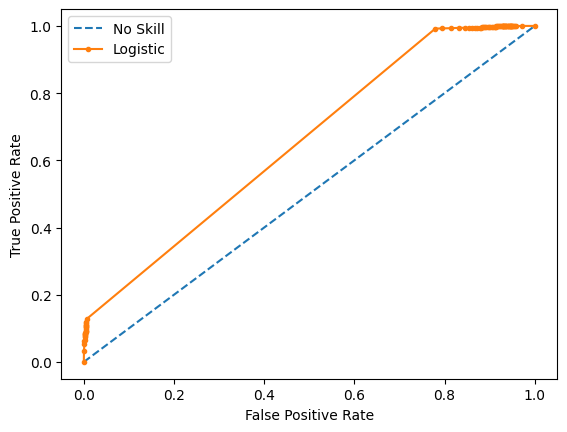

In [122]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_RF_ai.png')
pyplot.show()

Logistic: f1=0.674 auc=0.774


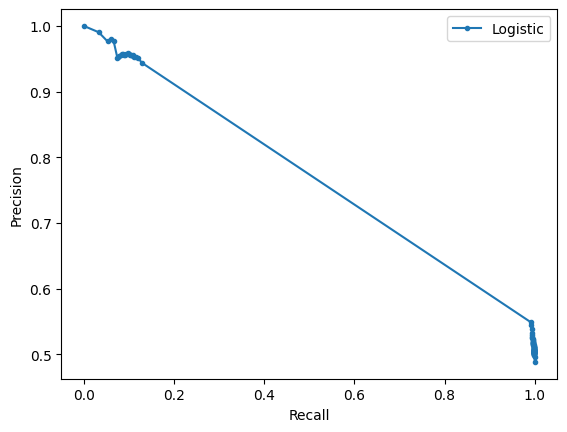

In [123]:
rf_probs = logits.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
yhat = logits.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
pyplot.plot(rf_recall, rf_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_RF_ai.png')
pyplot.show()

*Random Forest* took much longer time to execute and still wasn't making a big difference in accuracy so we decided to keep only Logistic Regression based algorithms

**Logistic Regression (1) - Real News vs. AI News**




In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = real_ai_X
y = real_ai_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
logit1 = lr.fit(X_train,y_train)
y_predict = logit1.predict(X_test)


print("Accuracy: ", logit1.score(X, y)*100,"%")

Accuracy:  92.034375 %


In [118]:
lr_probs=logit1.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.654


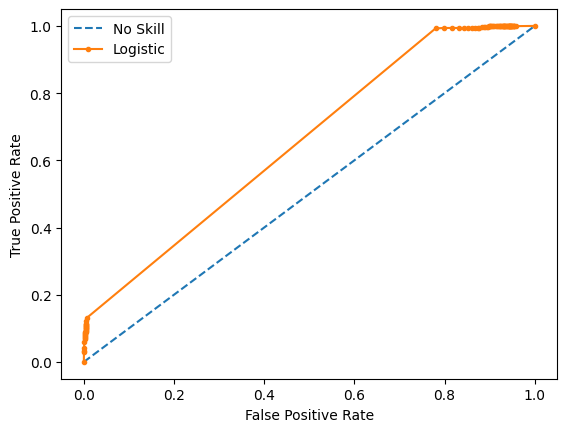

In [119]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_LR_ai.png')
pyplot.show()

Logistic: f1=0.676 auc=0.778


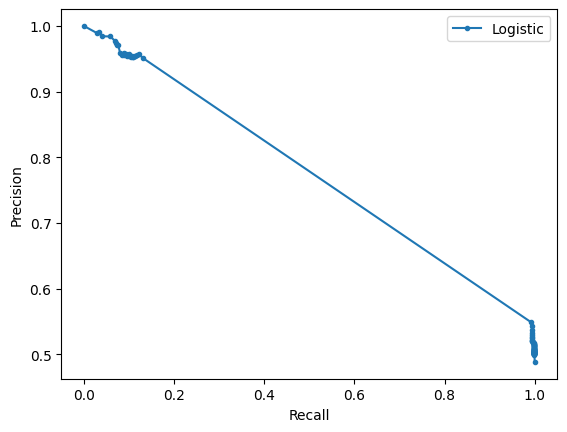

In [120]:
lr_probs = logit1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logit1.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves

pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_LR_ai.png')
pyplot.show()

**Logistic Regression (2) - Real News vs. Human Fake News**



In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = real_human_X
y = real_human_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

lr = LogisticRegression()
logit = lr.fit(X_train,y_train)
y_predict = logit.predict(X_test)

print("Accuracy: ", logit.score(X, y)*100,"%")

Accuracy:  93.21249999999999 %


Logistic: ROC AUC=0.748


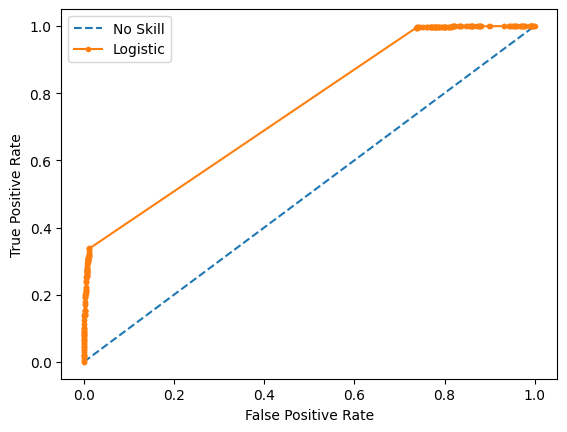

Logistic: f1=0.496 auc=0.840


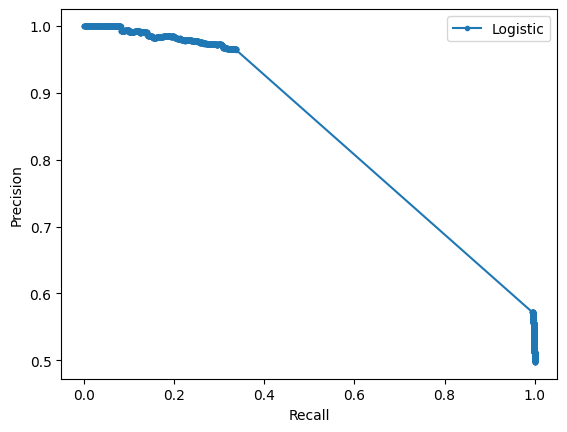

In [126]:
lr_probs=logit.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_LR_WOai.png')
pyplot.show()
lr_probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logit.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves

pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_LR_WOai.png')
pyplot.show()

**Logistic Regression (3) - Real News vs. All Fake News**



In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = real_allfake_X
y = real_allfake_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
logit = lr.fit(X_train,y_train)
y_predict = logit.predict(X_test)

print("Accuracy: ", logit.score(X, y)*100,"%")

Accuracy:  91.2264705882353 %


In [1]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

NameError: name 'y_test' is not defined

Logistic: ROC AUC=0.700


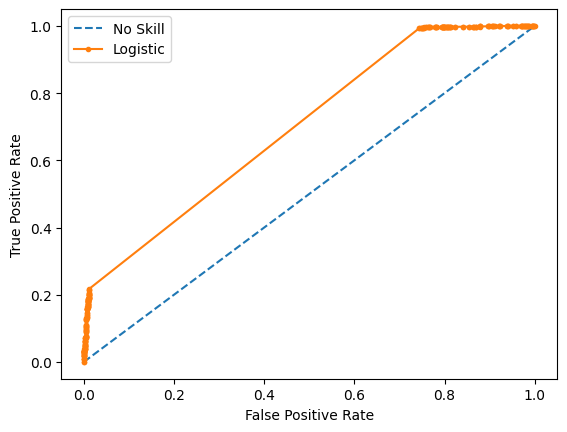

Logistic: f1=0.707 auc=0.815


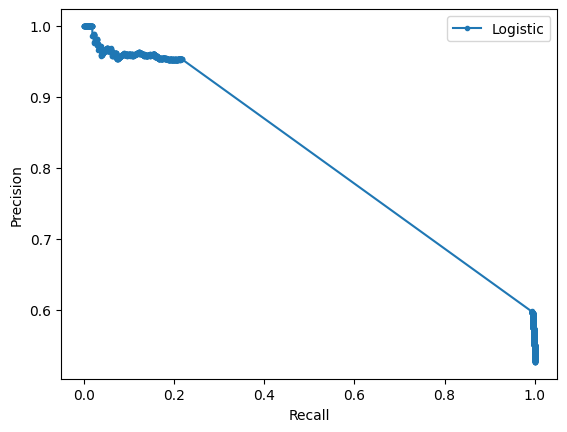

In [128]:
lr_probs=logit.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_LR_all.png')
pyplot.show()
lr_probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logit.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves

pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_LR_all.png')
pyplot.show()

**Logistic Regression Interpretation**

Our Logit model was able to obtain around a 90-93% accuracy in classifying our data. Even though our accuracy was quite high but the ROC curves clearly showed that there could be a lot of improvement done by utilizing more complex models such as a neural network would be worth it to add complexity. 

**Support Vector Machine (SVM) - Support Vector Classifier (SVC)**


**SVM (1) - Real News vs. AI News**

In [95]:
from sklearn.svm import SVC

X = real_ai_X
y = real_ai_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC()
svm = svc.fit(X_train,y_train)
y_predict = svm.predict(X_test)

print("Accuracy: ", svm.score(X, y)*100,"%")

Accuracy:  90.446875 %


**SVM (2) - Real News vs. Human Fake News**

In [96]:
from sklearn.svm import SVC

X = real_human_X
y = real_human_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svc = SVC()
svm = svc.fit(X_train,y_train)
y_predict = svm.predict(X_test)

print("Accuracy: ", svm.score(X, y)*100,"%")

Accuracy:  92.05312500000001 %


**SVM (3) - Real News vs. All Fake News**

In [97]:
from sklearn.svm import SVC

X = real_allfake_X
y = real_allfake_text_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svc = SVC()
svm = svc.fit(X_train,y_train)
y_predict = svm.predict(X_test)

print("Accuracy: ", svm.score(X, y)*100,"%")

Accuracy:  91.0235294117647 %


### **Results**

At first, when we ran our models we noticed that we had unreasonably high accuracies. This made us realize that a lot of our data was not pre-processed fully since our model was obtaining near 100% accuracy while only being trained on a small subset of the data. We looked back to the EDA and noticed some features were very distinguishable between the different classes (avg. words per sentence, article lengths, news-content). We normalized for these features and were able to successfully remove those factors.

Our first step in modeling was to represent our text data in a vector space. We did this by using a TF-IDF vectorizer and creating a sparse matrix of our features. We were able to develop around 650,000 features and ran them through our models. When executing the k-means clustering algorithm, we set k=3 to see how well the clusters the unsupervised algorithm found correlated with the actual classes. When doing this, we noticed that the clusters were fairly accurate and thus believed that our classification models would also be accurate.

We used a logistic regression first to obtain a baseline accuracy. That accuracy was around 90%-93% for all three of our sub-problems. We ran an SVM after expecting the accuracy to be higher. We expected this because an SVM is more complex and when we looked at the clusters of our principal components, we noticed distinguishable centroids and thus thought an SVM would be able to capitalize on this by finding support vectors that maximize the distance between the two clusters. In the end, the accuracies stayed around the same for both.

